In [1]:
#Main File
from utilities import *
file = 'data/series_historicas_28122023031036.csv'

df = read_data(file)
df = convertir(df)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

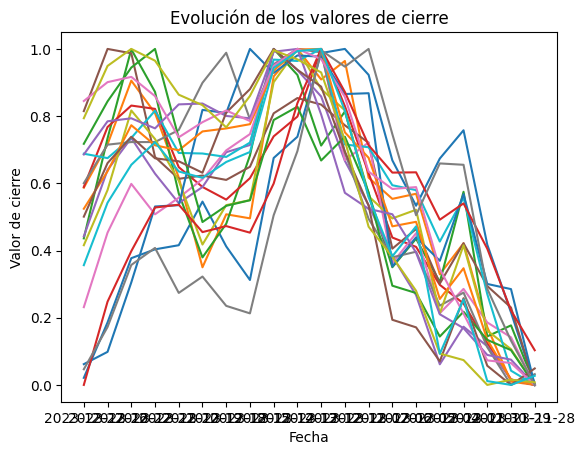

In [3]:
grupos_por_simbolo = df.groupby('SIMBOLO')
df = pd.DataFrame()

for clave_grupo in grupos_por_simbolo.groups.keys():
    df=normalizar(grupos_por_simbolo.get_group(clave_grupo))
    plt.plot(df['FECHA'], df['CIERRE_N']) 
    
plt.xlabel('Fecha')
plt.ylabel('Valor de cierre')
plt.title('Evolución de los valores de cierre')

plt.show()